In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Boston-house-price-data.csv')

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
data=df

In [6]:
X = df.drop('MEDV', axis=1)  # Replace 'MEDV' if target column has a different name
y = df['MEDV']

In [7]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24

In [8]:
print("\nFirst 10 rows of feature data:")
print(X.head(10))


First 10 rows of feature data:
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  3

In [9]:
print("\nFeature statistics:")
print(X.describe())


Feature statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std   

In [12]:
df.corr()['MEDV'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [13]:
X = df.loc[:,['LSTAT','PTRATIO','RM']]
Y = df.loc[:,"MEDV"]
X.shape,Y.shape

((506, 3), (506,))

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=10)

In [17]:


scaler = StandardScaler()



In [18]:


scaler.fit(x_train)



StandardScaler()

In [19]:


x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



In [20]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:


model = Sequential()



In [22]:
model.add(Dense(128,input_shape=(3,),activation='relu',name='input'))
model.add(Dense(64,activation='relu',name='layer_1'))
model.add(Dense(1,activation='linear',name='output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               512       
                                                                 
 layer_1 (Dense)             (None, 64)                8256      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 8833 (34.50 KB)
Trainable params: 8833 (34.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.fit(x_train,y_train,epochs=100,validation_split=0.05)

Epoch 1/100
12/12 [==============================] - 2s 36ms/step - loss: 545.6389 - mae: 21.7153 - val_loss: 719.3070 - val_mae: 24.1594
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 516.4986 - mae: 21.0682 - val_loss: 683.6697 - val_mae: 23.4253
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 478.0524 - mae: 20.2203 - val_loss: 633.9849 - val_mae: 22.3660
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 423.8990 - mae: 18.9333 - val_loss: 563.1567 - val_mae: 20.7810
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 348.0690 - mae: 17.0089 - val_loss: 470.3728 - val_mae: 18.5414
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 251.4218 - mae: 14.3263 - val_loss: 362.5221 - val_mae: 15.9093
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 154.9116 - mae: 11.0921 - val_loss: 253.2830 - val_mae: 12.5779
Epoch 8/100
12/12 [=====================

In [24]:
output = model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 23.1340 - mae: 3.1597


In [25]:
print(f"Mean Squared Error: {output[0]}"
      ,f"Mean Absolute Error: {output[1]}",sep="\n")

Mean Squared Error: 23.1340274810791
Mean Absolute Error: 3.159721612930298


In [26]:
y_pred = model.predict(x=x_test)

4/4 [==============================] - 0s 3ms/step


In [28]:
y_pred

array([[24.531403 ],
       [30.571045 ],
       [26.120218 ],
       [27.553053 ],
       [20.168846 ],
       [16.386955 ],
       [41.716927 ],
       [14.481337 ],
       [18.981688 ],
       [42.529156 ],
       [17.596273 ],
       [26.04146  ],
       [21.974623 ],
       [31.715368 ],
       [30.447918 ],
       [51.19996  ],
       [26.074648 ],
       [19.191044 ],
       [20.979582 ],
       [19.284063 ],
       [33.52401  ],
       [15.53543  ],
       [21.671124 ],
       [25.130613 ],
       [36.76535  ],
       [20.986286 ],
       [17.637497 ],
       [16.45162  ],
       [42.245773 ],
       [10.692363 ],
       [35.42881  ],
       [31.55699  ],
       [25.934734 ],
       [23.681532 ],
       [15.082169 ],
       [19.277775 ],
       [ 8.7014065],
       [31.927916 ],
       [24.470629 ],
       [23.91102  ],
       [38.670227 ],
       [25.812822 ],
       [13.696704 ],
       [29.226469 ],
       [16.564777 ],
       [26.755548 ],
       [17.687914 ],
       [18.41

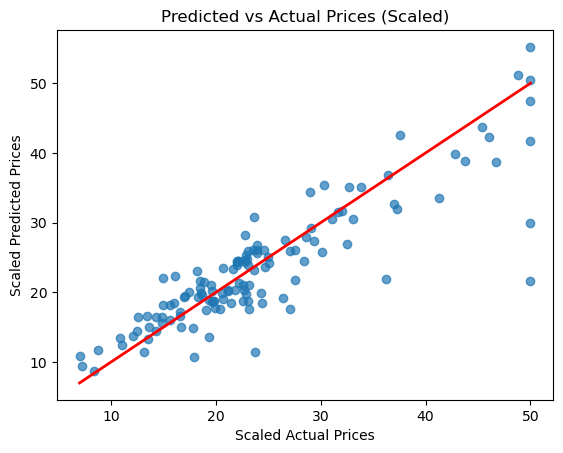

In [29]:


# Plot Predicted vs Actual values in scaled form
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line for perfect prediction
plt.xlabel("Scaled Actual Prices")
plt.ylabel("Scaled Predicted Prices")
plt.title("Predicted vs Actual Prices (Scaled)")
plt.show()
